In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

### sigma x beta factor calculation

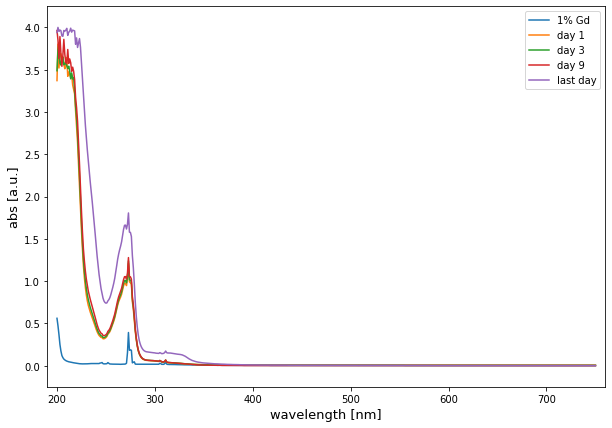

In [26]:
# load and plot spectra
Gd_wavelen, Gd_abs = np.loadtxt("/Users/juhe/annie/1pct_Gd_dataonly.txt", dtype=float,
                            comments='"', delimiter=',', unpack=True)

day1_wavelen, day1_abs = np.loadtxt("/Users/juhe/annie/black_pvcliner_Gd_soak2_day1_dataonly.txt", 
                                   dtype=float, comments='"', delimiter=',', unpack=True)

day3_wavelen, day3_abs = np.loadtxt("/Users/juhe/annie/black_pvcliner_Gd_soak2_day3_dataonly.txt", 
                                   dtype=float, comments='"', delimiter=',', unpack=True)

day9_wavelen, day9_abs = np.loadtxt("/Users/juhe/annie/black_pvcliner_Gd_soak2_day9_dataonly.txt", 
                                   dtype=float, comments='"', delimiter=',', unpack=True)

lastday_wavelen, lastday_abs = np.loadtxt("/Users/juhe/annie/black_pvcliner_Gd_soak2_lastday_dataonly.txt", 
                                   dtype=float, comments='"', delimiter=',', unpack=True)

plt.figure(figsize=(10,7))
plt.plot(Gd_wavelen, Gd_abs, label="1% Gd")
plt.plot(day1_wavelen, day1_abs, label="day 1")
plt.plot(day3_wavelen, day3_abs, label="day 3")
plt.plot(day9_wavelen, day9_abs, label="day 9")
plt.plot(lastday_wavelen, lastday_abs, label="last day")
plt.xlim((190, 760))
plt.ylim((-0.25, 4.25))
plt.xlabel("wavelength [nm]", fontsize=13)
plt.ylabel("abs [a.u.]", fontsize=13)
plt.legend()
plt.savefig("pvcliner_spectra.png")

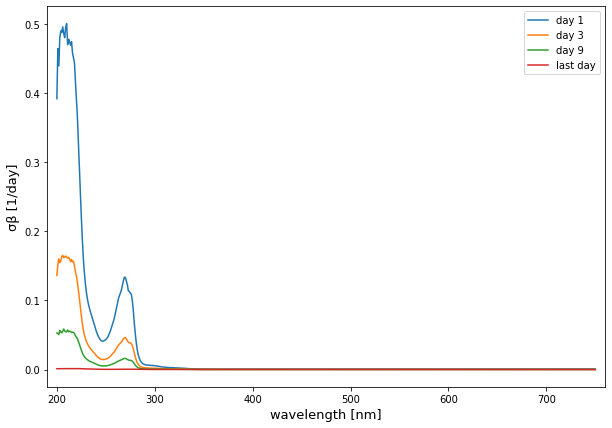

In [23]:
surfArea = 412.9024 #cm^2
medVol = 250. #mL or cm^3 (assuming density of medium is that of water)
SVratio = surfArea/medVol #cm^-1
L1 = 10. #cm

sigmabeta_day1 = []
DAY1 = 1.
for i in range(len(Gd_wavelen)):
    deltaAbs = day1_abs[i] - Gd_abs[i]
    if (deltaAbs < 0.):
        deltaAbs = 0.
    
    sigmabeta_day1.append(np.log(10.)*deltaAbs/(SVratio*DAY1*L1))


sigmabeta_day3 = []
DAY3 = 3.
for i in range(len(Gd_wavelen)):
    deltaAbs = day3_abs[i] - Gd_abs[i]
    if (deltaAbs < 0.):
        deltaAbs = 0.
    
    sigmabeta_day3.append(np.log(10.)*deltaAbs/(SVratio*DAY3*L1))


sigmabeta_day9 = []
DAY9 = 9.
for i in range(len(Gd_wavelen)):
    deltaAbs = day9_abs[i] - Gd_abs[i]
    if (deltaAbs < 0.):
        deltaAbs = 0.
    
    sigmabeta_day9.append(np.log(10.)*deltaAbs/(SVratio*DAY9*L1))


sigmabeta_day427 = []
DAY427 = 427.
for i in range(len(Gd_wavelen)):
    deltaAbs = lastday_abs[i] - Gd_abs[i]
    if (deltaAbs < 0.):
        deltaAbs = 0.
    
    sigmabeta_day427.append(np.log(10.)*deltaAbs/(SVratio*DAY427*L1))


plt.figure(figsize=(10,7))
plt.plot(day1_wavelen, sigmabeta_day1, label="day 1")
plt.plot(day3_wavelen, sigmabeta_day3, label="day 3")
plt.plot(day9_wavelen, sigmabeta_day9, label="day 9")
plt.plot(lastday_wavelen, sigmabeta_day427, label="last day")
plt.xlim((190, 760))
# plt.ylim((-0.25, 4.25))
plt.xlabel("wavelength [nm]", fontsize=13)
plt.ylabel("\u03C3\u03B2 [1/day]", fontsize=13)
plt.legend()
plt.savefig("sigmabeta_compare.png")

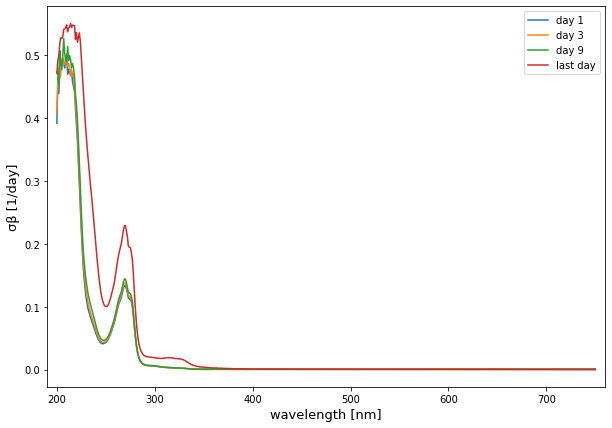

In [22]:
surfArea = 412.9024 #cm^2
medVol = 250. #mL or cm^3 (assuming density of medium is that of water)
SVratio = surfArea/medVol #cm^-1
L1 = 10. #cm

sigmabeta_day1 = []
DAY1 = 1.
for i in range(len(Gd_wavelen)):
    deltaAbs = day1_abs[i] - Gd_abs[i]
    if (deltaAbs < 0.):
        deltaAbs = 0.
    
    sigmabeta_day1.append(np.log(10.)*deltaAbs/(SVratio*DAY1*L1))


sigmabeta_day3 = []
DAY3 = 3.
for i in range(len(Gd_wavelen)):
    deltaAbs = day3_abs[i] - Gd_abs[i]
    if (deltaAbs < 0.):
        deltaAbs = 0.
    
    sigmabeta_day3.append(np.log(10.)*deltaAbs/(SVratio*DAY1*L1))


sigmabeta_day9 = []
DAY9 = 9.
for i in range(len(Gd_wavelen)):
    deltaAbs = day9_abs[i] - Gd_abs[i]
    if (deltaAbs < 0.):
        deltaAbs = 0.
    
    sigmabeta_day9.append(np.log(10.)*deltaAbs/(SVratio*DAY1*L1))


sigmabeta_day427 = []
DAY427 = 427.
for i in range(len(Gd_wavelen)):
    deltaAbs = lastday_abs[i] - Gd_abs[i]
    if (deltaAbs < 0.):
        deltaAbs = 0.
    
    sigmabeta_day427.append(np.log(10.)*deltaAbs/(SVratio*DAY1*L1))


plt.figure(figsize=(10,7))
plt.plot(day1_wavelen, sigmabeta_day1, label="day 1")
plt.plot(day3_wavelen, sigmabeta_day3, label="day 3")
plt.plot(day9_wavelen, sigmabeta_day9, label="day 9")
plt.plot(lastday_wavelen, sigmabeta_day427, label="last day")
plt.xlim((190, 760))
# plt.ylim((-0.25, 4.25))
plt.xlabel("wavelength [nm]", fontsize=13)
plt.ylabel("\u03C3\u03B2 [1/day]", fontsize=13)
plt.legend()

### UV-vis: extrapolation of A and convolution of QE and Cherenkov spectrum

In [ ]:
Gd_wavelen, Gd_abs = np.loadtxt("/home/juhe/Downloads/1pct_Gd_dataonly.txt", dtype=float,
                                comments='"', delimiter=',', unpack=True)

plt.figure(figsize=(10,7))
plt.plot(Gd_wavelen, Gd_abs)
plt.xlim((190, 760))
plt.ylim((-0.25, 4.25))
plt.xlabel("wavelength [nm]", fontsize=13)
plt.ylabel("abs [a.u.]", fontsize=13)

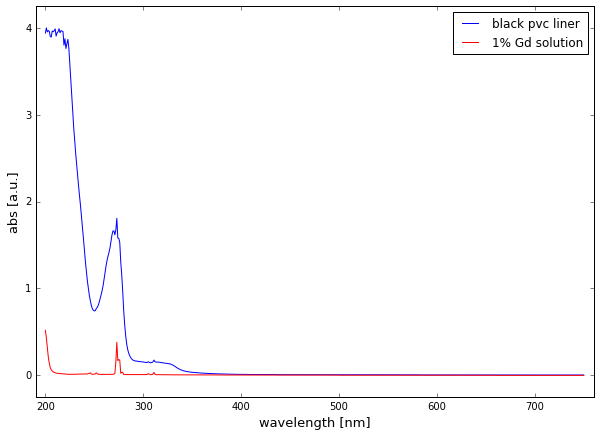

In [116]:
wavelen, absorb = np.loadtxt("/home/juhe/Downloads/black_pvcliner_Gd_soak2_dataonly.txt",
                             dtype=float, comments='"', delimiter=',', unpack=True)

plt.figure(figsize=(10,7))
plt.plot(wavelen, absorb, label='black pvc liner')
plt.plot(Gd_wavelen, Gd_abs, color='red', label='1% Gd solution')
plt.legend()
plt.xlim((190, 760))
plt.ylim((-0.25, 4.25))
plt.xlabel("wavelength [nm]", fontsize=13)
plt.ylabel("abs [a.u.]", fontsize=13)
plt.savefig("black_pvcliner_spectrum.png")

In [117]:
# extrapolate to 10 m

T_at10 = []
for i in range(len(wavelen)):
    T_at10.append((10.**(-absorb[i]))**100)
    
logT_at10 = []
for i in range(len(wavelen)):
    if (T_at10[i] <= 0.):
        logT_at10.append(0.)
    else:
        logT_at10.append(np.log(T_at10[i]))

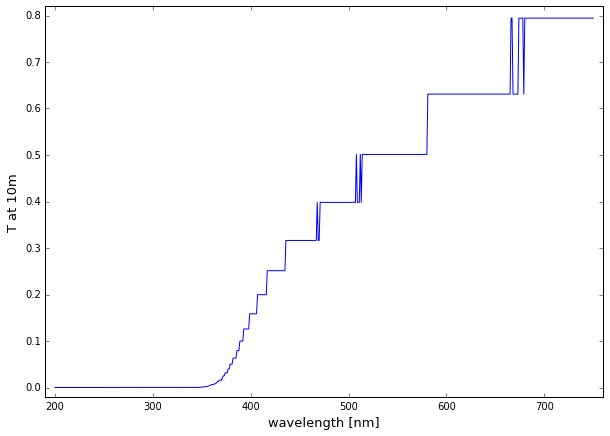

In [118]:
plt.figure(figsize=(10,7))
plt.plot(wavelen, T_at10)
plt.xlim((190, 760))
plt.ylim((-0.02, 0.82))
plt.xlabel("wavelength [nm]", fontsize=13)
plt.ylabel("T at 10m", fontsize=13)
plt.savefig("T_at10m.png")

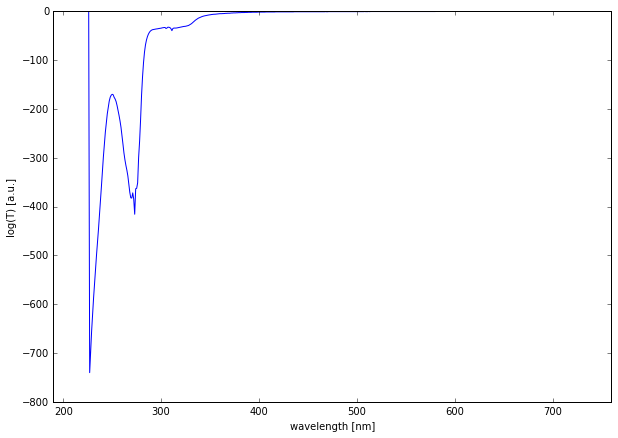

In [119]:
plt.figure(figsize=(10,7))
plt.plot(wavelen, logT_at10)
plt.xlim((190, 760))
#plt.ylim((-0.25, 4.25))
plt.xlabel("wavelength [nm]")
plt.ylabel("log(T) [a.u.]")

In [124]:
# PMT QE curve from RAT-PAC

#pmt_wavelen = [270.29, 272.15, 272.19, 275.03, 276.89, 276.94, 278.8, 281.69, 284.57, 286.47, 
#                288.38, 291.26, 294.15, 298.98, 303.82, 311.58, 325.21, 345.68, 368.12, 385.68, 
#                407.15, 429.6, 448.15, 468.66, 485.26, 504.79, 521.4, 535.1, 545.87, 558.59, 
#                572.27, 586.95, 600.64, 611.4, 622.17, 631, 639.81, 648.64, 655.51, 661.4, 668.28, 
#                674.17, 680.07, 684.99, 688.93, 693.86, 698.78, 703.7, 709.59, 714.51, 717.49, 723.38]

#pmt_qe = [0.0023, 0.0043, 0.0033, 0.006, 0.0113, 0.0081, 0.0153, 0.0207, 0.0288, 0.0401, 0.0528, 
#           0.0725, 0.0981, 0.1347, 0.1798, 0.2399, 0.2978, 0.3391, 0.344, 0.3391, 0.3342, 0.3021, 
#           0.2731, 0.2399, 0.2047, 0.1798, 0.1512, 0.1183, 0.09, 0.0694, 0.0567, 0.0437, 0.0347, 
#           0.0272, 0.0207, 0.0153, 0.0119, 0.0085, 0.0065, 0.0049, 0.0036, 0.0027, 0.0019, 0.0014, 
#           0.0011, 0.0008, 0.0005, 0.0004, 0.0003, 0.0002, 0.0002, 0.0001]

# plt.plot(pmt_wavelen, pmt_qe)
# plt.xlabel('wavelength [nm]')
# plt.ylabel('QE')

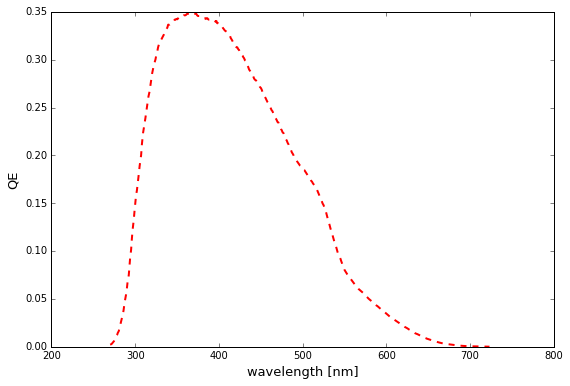

In [121]:
pmt_wavelen, pmt_logqe = np.loadtxt("/home/juhe/Downloads/r7081_qe.csv", dtype=float, 
                                   delimiter=',', unpack=True)
pmt_qe = pmt_logqe/100.

plt.figure(figsize=(9,6))
plt.plot(pmt_wavelen, pmt_qe, color='red', linestyle='dashed', linewidth='2')
plt.xlabel('wavelength [nm]', fontsize=13)
plt.ylabel('QE', fontsize=13)
plt.savefig("r7081_qe.png")

# print(pmt_wavelen)
# print(pmt_qe)

In [130]:
# convolving PMT QE curve
T_qe = []
j = 70

for i in range(len(pmt_wavelen)):
#     print(wavelen[j])
    T_qe.append(pmt_qe[i]*T_at10[j])
    j+=1

# print(len(pmt_wavelen))
# print((T_qe))

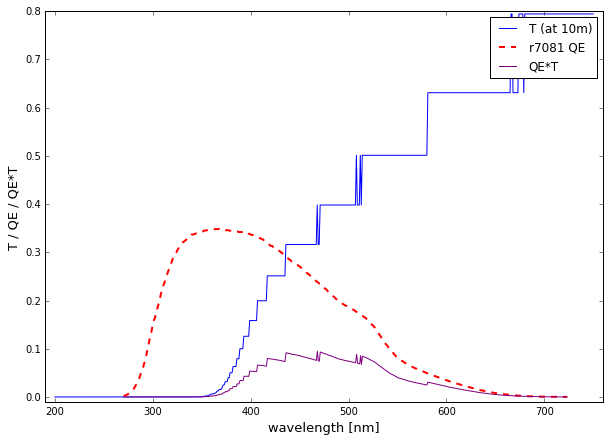

In [142]:
plt.figure(figsize=(10,7))
plt.plot(wavelen, T_at10, label='T (at 10m)')
plt.plot(pmt_wavelen, pmt_qe, color='red', linestyle='dashed', linewidth=2, label='R7081 QE')
plt.plot(pmt_wavelen, T_qe, color='purple', label='QE*T')
plt.legend()
plt.xlim((190, 760))
plt.ylim((-0.01, 0.80))
plt.xlabel('wavelength [nm]', fontsize=13)
plt.ylabel('T / QE / QE*T', fontsize=13)
plt.savefig("T_QE.png")

In [58]:
def gauss(x, mu, sigma, n):
    return (n*np.exp(-(x-mu)**2/sigma**2))

def cherenkov(x, N):
    return (N/x**2)

In [143]:
popt, pcov = curve_fit(gauss, pmt_wavelen, T_qe, p0=[475., 50., 0.9])

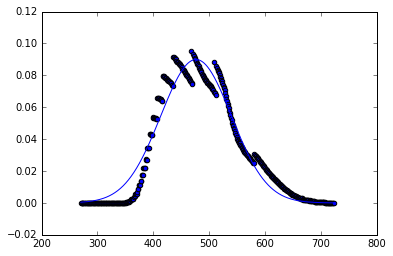

In [144]:
T_qe_fit = gauss(pmt_wavelen, *popt)
plt.plot(pmt_wavelen, T_qe_fit)
plt.scatter(pmt_wavelen, T_qe)

(0.027027196169580506, 330.06973970595595, 12212.503939918643)


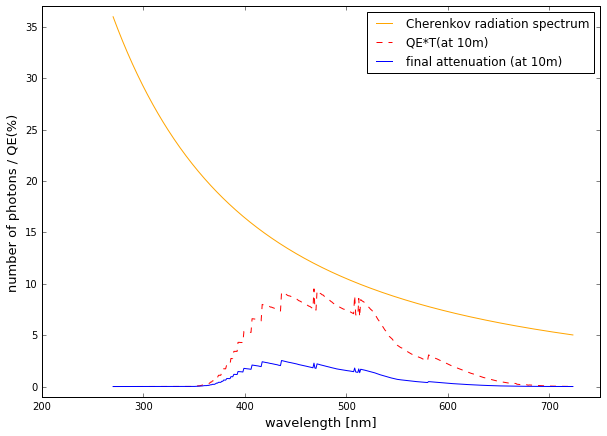

In [148]:
nphot_at10 = 0.
totphot = 0.
cher = []
cher_att = []

for i in range(len(pmt_wavelen)):
    cher.append(cherenkov(pmt_wavelen[i], 5.25E6))
    cher_att.append(cherenkov(pmt_wavelen[i], 5.25E6)*T_qe[i])
    totphot += cherenkov(pmt_wavelen[i], 5.25E6)
    nphot_at10 += cherenkov(pmt_wavelen[i], 5.25E6)*T_qe[i]

f = nphot_at10/totphot
print(f, nphot_at10, totphot)

plt.figure(figsize=(10,7))
plt.plot(pmt_wavelen, np.array(cher)/2., color='orange', label='Cherenkov radiation spectrum')
plt.plot(pmt_wavelen, 100.*np.array(T_qe), color='red', linestyle='dashed', label='QE*T(at 10m)')
plt.plot(pmt_wavelen, cher_att, label='final attenuation (at 10m)')
plt.legend()
plt.xlim((200, 750))
plt.ylim((-1, 37))
plt.xlabel('wavelength [nm]', fontsize=13)
plt.ylabel('number of photons / QE(%)', fontsize=13)
plt.savefig("convolution.png")